In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# file path 
file_path = r'C:\Users\SHREE\OneDrive\Desktop\7th sem project\movie-recommender-system-tmdb-dataset-main\ted_main.csv'  
data = pd.read_csv(file_path)

In [8]:
# no of rows & columns
print("Dataset Shape:", data.shape)

Dataset Shape: (2550, 12)


In [9]:
# Check if there are any missing or null values in each row
missing_values = data.isnull().sum(axis=1)

# Display the rows with missing values
missing_rows = data[missing_values > 0]

# Show the number of missing values in each row
print(missing_values)

# Display rows with missing values, if any
if not missing_rows.empty:
    print("Rows with missing values:")
    print(missing_rows)
else:
    print("No rows with missing values.")


0       0
1       0
2       0
3       0
4       0
       ..
2545    0
2546    0
2547    0
2548    0
2549    0
Length: 2550, dtype: int64
No rows with missing values.


In [10]:
# Print all columns along with their data types
print(data.dtypes)


comments           int64
description       object
duration           int64
event             object
film_date          int64
languages          int64
speaker           object
published_date     int64
tags              object
title             object
url               object
views              int64
dtype: object


In [11]:
#coverting date format
data['film_date'] = pd.to_datetime(data['film_date'], unit='s')
data['published_date'] = pd.to_datetime(data['published_date'], unit='s')

In [12]:
#finding the oldest & latest date of the talk

print("Film Date Range:\n", data['film_date'].min(), "to", data['film_date'].max())
print("\nPublished Date Range:\n", data['published_date'].min(), "to", data['published_date'].max())

Film Date Range:
 1972-05-14 00:00:00 to 2017-08-27 00:00:00

Published Date Range:
 2006-06-27 00:11:00 to 2017-09-22 15:00:22


In [13]:
oldest_video = data.loc[data['published_date'].idxmin()]

# Find the latest (newest) video by publish date
newest_video = data.loc[data['published_date'].idxmax()]

# Print the results (title and publish date for both earliest and latest)
print("Oldest Video:")
print(f"Title: {oldest_video['title']}, Publish Date: {oldest_video['published_date']}")

print("\nNewest Video:")
print(f"Title: {newest_video['title']}, Publish Date: {newest_video['published_date']}")


Oldest Video:
Title: Do schools kill creativity?, Publish Date: 2006-06-27 00:11:00

Newest Video:
Title: How a video game might help us build better cities, Publish Date: 2017-09-22 15:00:22


In [14]:
# Top 10 Most Viewed Talks
top_talks = data.nlargest(10, 'views')[['title','speaker', 'views']]
print("Top 10 Most Viewed Talks:\n", top_talks)

Top 10 Most Viewed Talks:
                                                   title            speaker  \
0                           Do schools kill creativity?       Ken Robinson   
1346           Your body language may shape who you are          Amy Cuddy   
677                    How great leaders inspire action        Simon Sinek   
837                          The power of vulnerability        Brené Brown   
452              10 things you didn't know about orgasm         Mary Roach   
1776         How to speak so that people want to listen    Julian Treasure   
201                                My stroke of insight  Jill Bolte Taylor   
5                                  Why we do what we do       Tony Robbins   
2114  This is what happens when you reply to spam email       James Veitch   
1416  Looks aren't everything. Believe me, I'm a model.    Cameron Russell   

         views  
0     47227110  
1346  43155405  
677   34309432  
837   31168150  
452   22270883  
1776  215946

In [15]:
# Least 10 viewed talks
least_talks = data.nsmallest(10, 'views')[['title', 'speaker','views']]
print("Least 10 Viewed Talks:\n", least_talks)

Least 10 Viewed Talks:
                                        title  \
594                         Stories of Haiti   
1112  The debut of the British Paraorchestra   
237                               "Kounandi"   
776                   The early birdwatchers   
1133        Let's bridge the digital divide!   
1229               Beethoven the businessman   
1141                    Deaf in the military   
1079               Don't misrepresent Africa   
1104    Change our culture, change our world   
1178              Beautiful artificial limbs   

                                        speaker   views  
594                            Edwidge Danticat   50443  
1112  Charles Hazlewood + British Paraorchestra   66668  
237                                Rokia Traore   82488  
776                                Tim Birkhead  112321  
1133                             Aleph Molinari  115346  
1229                                 José Bowen  117756  
1141                                Keith

In [16]:
# Top 10 longest & shortest Talks

# Converting duration in seconds to minutes
data['duration_minutes'] = (data['duration'] / 60).round(2)

# Function to convert seconds into HH:MM:SS format
def seconds_to_hms(seconds):
    hours = seconds // 3600  # Get the number of hours
    minutes = (seconds % 3600) // 60  # Get the number of minutes
    seconds = seconds % 60  # Get the remaining seconds
    return f"{hours:02}:{minutes:02}:{seconds:02}"  # Format as HH:MM:SS

# Apply the function to the 'duration' column
data['duration_hms'] = data['duration'].apply(seconds_to_hms)


longest_talks = data.nlargest(10, 'duration_minutes')[['title', 'duration_hms']]
print("Top 10 longest Talks:\n", longest_talks)


shortest_talks = data.nsmallest(10, 'duration_minutes').sort_values(by='duration_hms', ascending=False)[['title', 'duration_hms']]
print("\n\n\nTop 10 shortest Talks:\n", shortest_talks)

Top 10 longest Talks:
                                                   title duration_hms
640                Parrots, the universe and everything     01:27:36
588              Really achieving your childhood dreams     01:16:27
629                           Physics is fun to imagine     01:05:55
2387  Nationalism vs. globalism: the new political d...     01:00:08
594                                    Stories of Haiti     00:59:33
600                          Growing up in the universe     00:57:55
580                       What's the right thing to do?     00:54:56
2421  Political common ground in a polarized United ...     00:47:33
947            Authentic creativity vs. karaoke culture     00:46:01
202                            My days as a young rebel     00:44:38



Top 10 shortest Talks:
                                                   title duration_hms
722                     Don't build your home, grow it!     00:02:56
593      Making maps to fight disaster, build economi

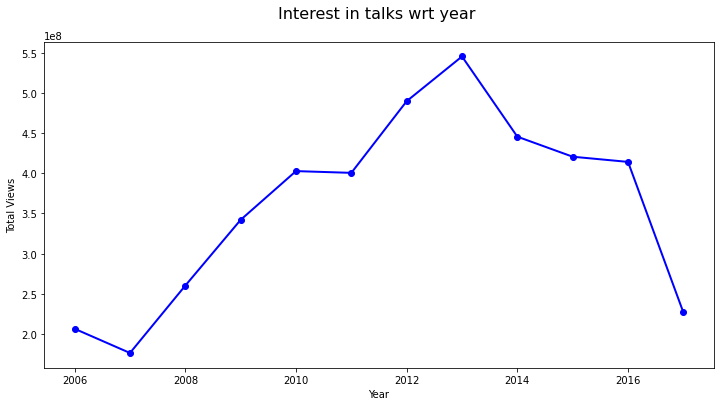

In [17]:
#Interest in talks wrt year

# Extract the year from the date
data['year'] = data['published_date'].dt.year

# Group by the 'year' and sum the 'views' for each year
views_per_year = data.groupby('year')['views'].sum().reset_index()

plt.figure(figsize=(12, 6))  
plt.plot(views_per_year['year'], views_per_year['views'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Interest in talks wrt year \n', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.show()


#1e8 shows 1x10^8

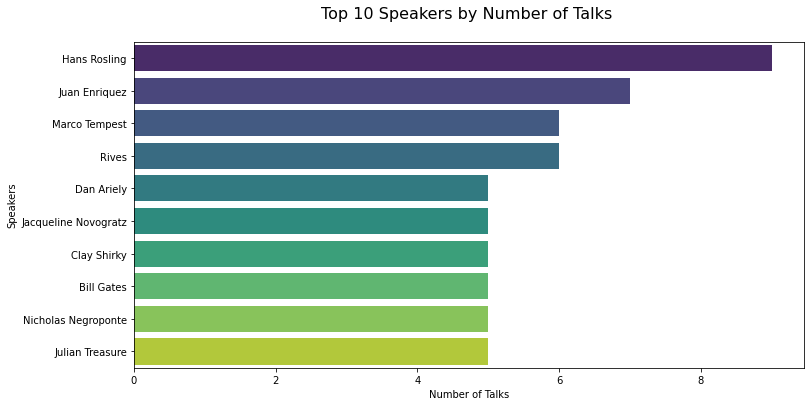

In [18]:
# Top 10 Speakers by Number of Talks
top_speakers = data['speaker'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_speakers.values, y=top_speakers.index, palette='viridis')
plt.title('Top 10 Speakers by Number of Talks \n', fontsize=16)
plt.xlabel('Number of Talks')
plt.ylabel('Speakers')
plt.show()

In [19]:
#samples
# Clean and Prepare Dataset
data['tags'] = data['tags'].fillna('[]').str.replace('[', '').str.replace(']', '').str.replace("'", "")
data['main_speaker'] = data['speaker'].fillna('')
data['title'] = data['title'].fillna('')
print("Sample Tags:\n", data['tags'].head())
print("\nSample Speaker:\n", data['speaker'].head())
print("\nSample Title:\n", data['title'].head())

Sample Tags:
 0    children, creativity, culture, dance, educatio...
1    alternative energy, cars, climate change, cult...
2    computers, entertainment, interface design, me...
3    MacArthur grant, activism, business, cities, e...
4    Africa, Asia, Google, demo, economics, global ...
Name: tags, dtype: object

Sample Speaker:
 0     Ken Robinson
1          Al Gore
2      David Pogue
3    Majora Carter
4     Hans Rosling
Name: speaker, dtype: object

Sample Title:
 0        Do schools kill creativity?
1        Averting the climate crisis
2                   Simplicity sells
3                Greening the ghetto
4    The best stats you've ever seen
Name: title, dtype: object


In [20]:
# Vectorize the Tags Column
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(", "))
tags_matrix = vectorizer.fit_transform(data['tags'])

In [21]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tags_matrix)

In [22]:
# Compute Cosine Similarity for User Input
def search_talks(user_input, data, tags_matrix, top_n=5):
    
     # Normalize user input
    user_input = user_input.strip().lower()
    
    # Match by Title
    title_matches = data[data['title'].str.lower() == user_input]

    # Match by Speaker
    speaker_matches = data[data['speaker'].str.lower().str.contains(user_input, na=False)]

    # Match by Tags
    user_tags_vector = vectorizer.transform([user_input])
    tag_scores = cosine_similarity(user_tags_vector, tags_matrix).flatten()
    tag_indices = tag_scores.argsort()[-top_n:][::-1]
    tag_matches = data.iloc[tag_indices]
    
    combined_results = pd.concat([title_matches, speaker_matches, tag_matches]).drop_duplicates()
    
    # Debugging Prints
    print(f"Title Matches Found: {len(title_matches)}")
    print(f"Speaker Matches Found: {len(speaker_matches)}")
    print(f"Tag-Based Matches Found: {len(tag_matches)}")
    print(f"Combined Results Before Limiting: {len(combined_results)}")

    # Ensure Only One Result If There Is an Exact Title Match
    if len(title_matches) == 1:
        return title_matches[['title', 'speaker', 'tags', 'duration_hms']]

    # Limit to top 5 only
    top_results = combined_results.head(1) if not title_matches.empty else combined_results.head(top_n)

    return top_results[['title', 'speaker', 'tags', 'duration_hms']]
    
   
   
    
  

In [25]:
# User Input
user_input = input("Enter a title, speaker name, or tags to search for TED Talks: ")

# Perform Search
search_results = search_talks(user_input, data, tags_matrix, top_n=5)

# Display Results
if isinstance(search_results, str):
    print(search_results)
else:
    print("\nSearch Results:")
    print(search_results)
    

Enter a title, speaker name, or tags to search for TED Talks: education
Title Matches Found: 0
Speaker Matches Found: 0
Tag-Based Matches Found: 5
Combined Results Before Limiting: 5

Search Results:
                                                  title               speaker  \
1588  Why our IQ levels are higher than our grandpar...           James Flynn   
1499                      "High School Training Ground"        Malcolm London   
1495               Learn to read Chinese ... with ease!               ShaoLan   
807                          Teaching design for change        Emily Pilloton   
1804                        Why lunch ladies are heroes  Jarrett J. Krosoczka   

                            tags duration_hms  
1588          culture, education     00:18:40  
1499           education, poetry     00:03:00  
1495  china, education, language     00:06:10  
807   design, education, poverty     00:16:43  
1804  books, children, education     00:05:24  
